In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it


228818944/228813984 [==============================] - 2s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [6]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/dandelion/3502447188_ab4a5055ac_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/177851662_b2622b4238_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7132605107_f5e033d725_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7015947703_11b30c20c9_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8270191872_61e47ae3b8_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/3505026222_c760df0035_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8707349105_6d06b543b0.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2330339852_fbbdeb7306_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14278605962_d3cce5522f.jpg'),
 PosixPath('datasets/flower_photos/dandelion/2326334426_2dc74fceb1.jpg'),
 PosixPath('datasets/flower_photos/dandelion/14335561523_f847f2f4f1.jpg'),
 PosixPath('datasets/flower_photos/dandelion/16987075_9a690a2183.jpg'),
 PosixPath('datasets/flower_photos/dandelion/16949657389_ac0ee80fd1_m.jpg'),
 PosixPath('datasets/f

In [7]:

list(data_dir.glob('*/*.jpg'))[:5]



[PosixPath('datasets/flower_photos/dandelion/3502447188_ab4a5055ac_m.jpg'),
 PosixPath('datasets/flower_photos/dandelion/177851662_b2622b4238_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7132605107_f5e033d725_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/7015947703_11b30c20c9_n.jpg'),
 PosixPath('datasets/flower_photos/dandelion/8270191872_61e47ae3b8_m.jpg')]

In [8]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [9]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/17305246720_1866d6303b.jpg'),
 PosixPath('datasets/flower_photos/roses/3742155164_14b557a51c_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8181940917_1ac63937d5_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1757822526_fe30b9b3ca_m.jpg'),
 PosixPath('datasets/flower_photos/roses/3236806990_a90c7bb520_m.jpg')]

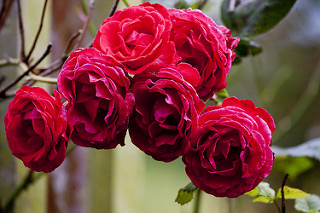

In [10]:

PIL.Image.open(str(roses[1]))

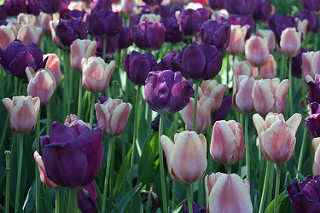

In [16]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[15]))

In [17]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [18]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [19]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [20]:
X = np.array(X)
y = np.array(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [22]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [23]:

num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 [==============================] - 74s 847ms/step - loss: 1.3964 - accuracy: 0.4062
Epoch 2/30
86/86 [==============================] - 72s 841ms/step - loss: 1.0186 - accuracy: 0.6047
Epoch 3/30
86/86 [==============================] - 72s 842ms/step - loss: 0.8676 - accuracy: 0.6795
Epoch 4/30
86/86 [==============================] - 73s 843ms/step - loss: 0.7078 - accuracy: 0.7406
Epoch 5/30
86/86 [==============================] - 73s 844ms/step - loss: 0.5441 - accuracy: 0.7940
Epoch 6/30
86/86 [==============================] - 73s 846ms/step - loss: 0.3376 - accuracy: 0.8866
Epoch 7/30
86/86 [==============================] - 73s 849ms/step - loss: 0.2165 - accuracy: 0.9266
Epoch 8/30
86/86 [==============================] - 73s 851ms/step - loss: 0.1191 - accuracy: 0.9688
Epoch 9/30
86/86 [==============================] - 73s 852ms/step - loss: 0.0627 - accuracy: 0.9847
Epoch 10/30
86/86 [==============================] - 73s 853ms/step - loss: 0.0314 - accura

In [24]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 7s 238ms/step - loss: 3.0748 - accuracy: 0.6481


[3.0748190879821777, 0.6481481194496155]

In [27]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(180, 180,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [29]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=10)


Epoch 1/10
86/86 [==============================] - 87s 997ms/step - loss: 1.4116 - accuracy: 0.3924
Epoch 2/10
86/86 [==============================] - 86s 996ms/step - loss: 1.0766 - accuracy: 0.5690
Epoch 3/10
86/86 [==============================] - 86s 996ms/step - loss: 0.9746 - accuracy: 0.6072
Epoch 4/10
86/86 [==============================] - 86s 997ms/step - loss: 0.8978 - accuracy: 0.6493
Epoch 5/10
86/86 [==============================] - 85s 991ms/step - loss: 0.8471 - accuracy: 0.6661
Epoch 6/10
86/86 [==============================] - 85s 990ms/step - loss: 0.7950 - accuracy: 0.6897
Epoch 7/10
86/86 [==============================] - 85s 993ms/step - loss: 0.7437 - accuracy: 0.7246
Epoch 8/10
86/86 [==============================] - 85s 991ms/step - loss: 0.7284 - accuracy: 0.7184
Epoch 9/10
86/86 [==============================] - 85s 990ms/step - loss: 0.6891 - accuracy: 0.7380
Epoch 10/10
86/86 [==============================] - 85s 993ms/step - loss: 0.6644 - accura

In [30]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 270ms/step - loss: 0.7797 - accuracy: 0.7081


[0.7797070145606995, 0.7080609798431396]